# $$\text{Financial Data Analytics}$$

## II. Financial Statement Analysis

As mentioned in the previous notebook, we'll rely on the data in the artifacts folder.
The script used for extraction is in the `data_extraction.ipynb` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Getting income statements
jnj_income_stmt = pd.read_csv("../artifacts/jnj/jnj_income_stmt.csv", index_col=0)
lly_income_stmt = pd.read_csv("../artifacts/lly/lly_income_stmt.csv", index_col=0)
mrk_income_stmt = pd.read_csv("../artifacts/mrk/mrk_income_stmt.csv", index_col=0)
unh_income_stmt = pd.read_csv("../artifacts/unh/unh_income_stmt.csv", index_col=0)


In [3]:
# Getting balance sheets
jnj_balance = pd.read_csv("../artifacts/jnj/jnj_balance_sheet.csv", index_col=0)
lly_balance = pd.read_csv("../artifacts/lly/lly_balance_sheet.csv", index_col=0)
mrk_balance = pd.read_csv("../artifacts/mrk/mrk_balance_sheet.csv", index_col=0)
unh_balance = pd.read_csv("../artifacts/unh/unh_balance_sheet.csv", index_col=0)

In [4]:
# A simple check of our output
jnj_balance.head()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
Treasury Shares Number,7.127650e+08,5.062460e+08,4.908780e+08,4.873310e+08
Ordinary Shares Number,2.407078e+09,2.613597e+09,2.628965e+09,2.632512e+09
Share Issued,3.119843e+09,3.119843e+09,3.119843e+09,3.119843e+09
Net Debt,7.473000e+09,2.675300e+10,1.926400e+10,2.128100e+10
Total Debt,2.933200e+10,3.964200e+10,3.375100e+10,3.526600e+10


###  Getting revenue data

In [5]:
revenues = pd.concat([jnj_income_stmt.T['Total Revenue'], lly_income_stmt.T['Total Revenue'], mrk_income_stmt.T['Total Revenue'], unh_income_stmt.T['Total Revenue']], axis=1)
revenues.columns = ['JNJ', 'LLY', 'MRK', 'UNH']
revenues.index = pd.to_datetime(revenues.index).year
revenues.sort_index(inplace=True)
revenues

,JNJ,LLY,MRK,UNH
2020,8.258400e+10,2.453980e+10,4.151800e+10,2.571410e+11
2021,7.874000e+10,2.831840e+10,4.870400e+10,2.875970e+11
2022,7.999000e+10,2.854140e+10,5.928300e+10,3.241620e+11
2023,8.515900e+10,3.412410e+10,6.011500e+10,3.716220e+11


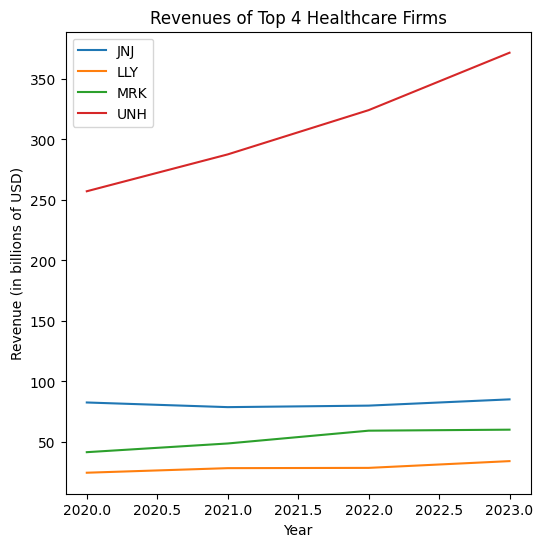

In [6]:
plt.figure(figsize=(6, 6))
for col in revenues.columns:
    plt.plot(revenues.index, revenues[col]/(10**9), label=col)
plt.xlabel('Year')
plt.ylabel('Revenue (in billions of USD)')
plt.title('Revenues of Top 4 Healthcare Firms')
plt.legend()
plt.show()

In order to make growth fluctuations more visible, we proceed by showing only other three firms revenues.

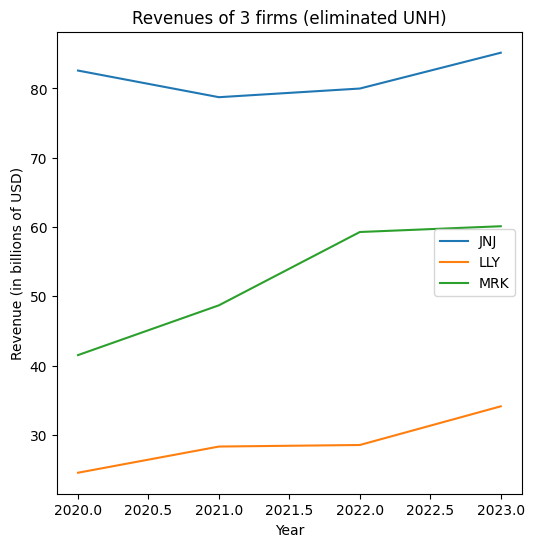

In [7]:
plt.figure(figsize=(6, 6))
for col in ['JNJ', 'LLY', 'MRK']:
    plt.plot(revenues.index, revenues[col]/(10**9), label=col)
plt.xlabel('Year')
plt.ylabel('Revenue (in billions of USD)')
plt.title('Revenues of 3 firms (eliminated UNH)')
plt.legend()
plt.show()

#### Revenue Interpretation:

- **UNH (UnitedHealth Group)** has the highest revenue among the four firms, with a steady increase from $257.14 billion in 2020 to $371.62 billion in 2023. This significant growth indicates UNH's strong position in the healthcare market.

- **JNJ (Johnson & Johnson)** has the second-highest revenue, ranging from $82.58 billion in 2020 to $85.16 billion in 2023. The revenue growth appears relatively stable over the years, suggesting a consistent performance in the healthcare industry.

- **MRK (Merck & Co.)** experienced a substantial revenue increase from $41.52 billion in 2020 to $60.12 billion in 2023. This significant growth could be attributed to successful product launches, acquisitions, or increased market share in specific healthcare segments.

- **LLY (Eli Lilly and Company)** had the lowest revenue among the four firms, but it showed a steady growth from $24.54 billion in 2020 to $34.12 billion in 2023. This upward trend indicates LLY's efforts to strengthen its position in the healthcare market.


>  With UNH leading the way in terms of revenue generation. It's important to note that revenue figures alone do not provide a complete picture of a company's financial health. That's why we have to analyze other metrics.

### **COGS (Cost Of Goods Sold)** analysis

- What Is Cost of Goods Sold (COGS)? 

    Cost of goods sold (COGS) refers to the direct costs of producing the goods sold by a company. This amount includes the cost of the materials and labor directly used to create the good. It excludes indirect expenses, such as distribution costs and sales force costs.

In [8]:
cogs = pd.concat([jnj_income_stmt.T['Cost Of Revenue'],
                  lly_income_stmt.T['Cost Of Revenue'], 
                  mrk_income_stmt.T['Cost Of Revenue'], 
                  unh_income_stmt.T['Cost Of Revenue']], 
                  axis=1)

cogs.columns = ['JNJ', 'LLY', 'MRK', 'UNH']
cogs.index = pd.to_datetime(cogs.index).year
cogs.sort_index(inplace=True)

cogs

,JNJ,LLY,MRK,UNH
2020,2.842700e+10,5.483300e+09,1.361800e+10,1.901410e+11
2021,2.340200e+10,7.312800e+09,1.362600e+10,2.179450e+11
2022,2.459600e+10,6.629800e+09,1.741100e+10,2.445450e+11
2023,2.655300e+10,7.082200e+09,1.612600e+10,2.806640e+11


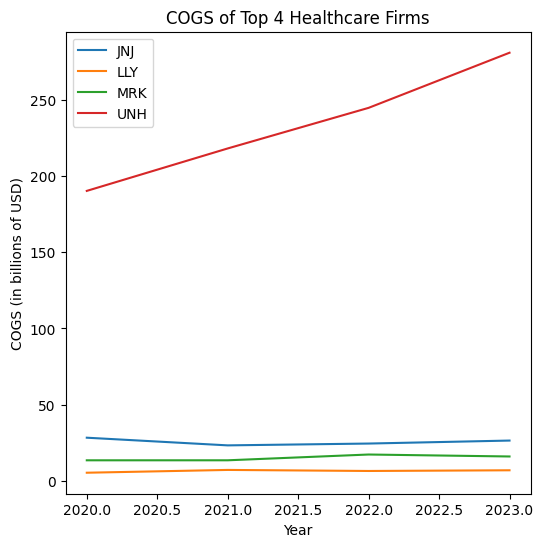

In [9]:
plt.figure(figsize=(6, 6))
for col in cogs.columns:
    plt.plot(cogs.index, cogs[col]/(10**9), label=col)
plt.xlabel('Year')
plt.ylabel('COGS (in billions of USD)')
plt.title('COGS of Top 4 Healthcare Firms')
plt.legend()
plt.show()

Again, UNH has the highest COGS among the four firms. We'll create another graph to see other three firms COGS.

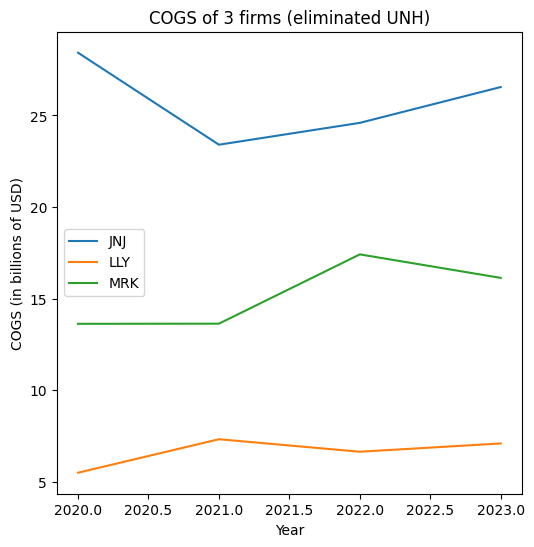

In [10]:
plt.figure(figsize=(6, 6))
for col in ['JNJ', 'LLY', 'MRK']:
    plt.plot(cogs.index, cogs[col]/(10**9), label=col)
plt.xlabel('Year')
plt.ylabel('COGS (in billions of USD)')
plt.title('COGS of 3 firms (eliminated UNH)')
plt.legend()
plt.show()

#### COGS interpretation

**UNH (UnitedHealth Group)** has the highest COGS among the four firms, with a steady increase from $190.14 billion in 2020 to $280.66 billion in 2023. This significant increase in COGS could be attributed to the growth in UNH's healthcare services and insurance operations.

**JNJ (Johnson & Johnson)** has the second-highest COGS, ranging from $28.43 billion in 2020 to $26.55 billion in 2023. The COGS values show a slight decrease over the years, which could indicate improved cost efficiencies or changes in the product mix.

**MRK (Merck & Co.)** experienced an increase in COGS from $13.62 billion in 2020 to $16.13 billion in 2023. This increase could be related to the growth in their pharmaceutical and healthcare product sales, as well as potential increases in manufacturing and distribution costs.

**LLY (Eli Lilly and Company)** had the lowest COGS among the four firms, but it showed an upward trend, increasing from $5.48 billion in 2020 to $7.08 billion in 2023. This increase in COGS could be due to higher production volumes or changes in the product portfolio.

-------------------------------------
#### Combined Revenue and COGS analysis

**UnitedHealth Group (UNH):**
- UNH has the highest revenue among the four firms. However, it also has the highest COGS.
- The substantial increase in COGS is likely due to the growth in UNH's healthcare services and insurance operations, which are directly tied to the increase in revenue. - While the high COGS indicates significant costs associated with delivering these services, the revenue growth outpaces the COGS growth, suggesting that UNH has been able to maintain profitability and operational efficiency.

**Johnson & Johnson (JNJ):**
- JNJ has the second-highest revenue with a relatively stable growth. However, its COGS decreased slightly from $28.43 billion in 2020 to $26.55 billion in 2023.
- This trend could indicate improved cost efficiencies, changes in the product mix, or potential restructuring efforts to optimize operations. 
- The stable revenue growth combined with a slight decrease in COGS could suggest an improvement in JNJ's profitability margins over the years.

**Merck & Co. (MRK):**
- MRK experienced a substantial revenue increase. At the same time, its COGS increased.
- The increase in COGS is likely related to the growth in pharmaceutical and healthcare product sales, as well as potential increases in manufacturing and distribution costs. 
- However, the rate of revenue growth outpaces the COGS growth, indicating that MRK has been able to leverage its sales growth while maintaining a relatively stable cost structure.

**Eli Lilly and Company (LLY):**
- LLY had the lowest revenue among the four firms, but it showed steady growth. 
- Its COGS also increased, but at a lower rate compared to the revenue growth.
- This trend suggests that LLY has been able to effectively manage its cost structure while expanding its revenue base, potentially leading to improved profitability margins over the years.
------------------------------------

### Total Assets analysis

- What are total assets ?


    Total assets refers to the sum of the book values of all assets owned by an individual, company, or organization. It is a parameter that is often used in net worth debt covenants. The value of a company's total assets is obtained after accounting for depreciation associated with the assets.


In [11]:
total_assets = pd.concat([jnj_balance.T['Total Assets'],
                  lly_balance.T['Total Assets'], 
                  mrk_balance.T['Total Assets'], 
                  unh_balance.T['Total Assets']], 
                  axis=1)

total_assets.columns = ['JNJ', 'LLY', 'MRK', 'UNH']
total_assets.index = pd.to_datetime(total_assets.index).year
total_assets.sort_index(inplace=True)

total_assets

,JNJ,LLY,MRK,UNH
2020,1.748940e+11,4.663310e+10,9.158800e+10,1.972890e+11
2021,1.820180e+11,4.880600e+10,1.056940e+11,2.122060e+11
2022,1.873780e+11,4.948980e+10,1.091600e+11,2.457050e+11
2023,1.675580e+11,6.400630e+10,1.066750e+11,2.737200e+11


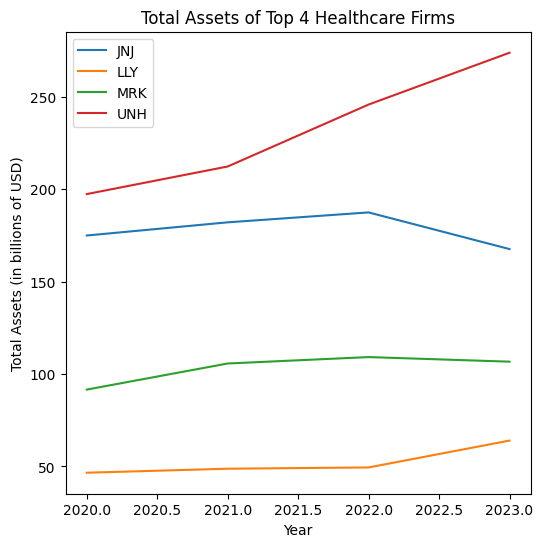

In [12]:
plt.figure(figsize=(6, 6))
for col in total_assets.columns:
    plt.plot(total_assets.index, total_assets[col]/(10**9), label=col)
plt.xlabel('Year')
plt.ylabel('Total Assets (in billions of USD)')
plt.title('Total Assets of Top 4 Healthcare Firms')
plt.legend()
plt.show()

#### Total Assets interpretation

**Johnson & Johnson (JNJ)**: Total assets increased from 2020 to 2022, but experienced a significant decline in 2023, suggesting potential asset divestitures or write-downs.

**Eli Lilly and Company (LLY)**: Consistent upward trend in total assets from 2020 to 2023, indicating investments in growth and expansion.

**Merck & Co. (MRK)**: Steady growth in total assets from 2020 to 2022, with a slight decrease in 2023, potentially due to asset disposals or valuation changes.

**UnitedHealth Group (UNH)**: Substantial increase in total assets from 2020 to 2023, likely driven by acquisitions and investments in infrastructure to support growth strategies.


### Total Liabilities Analysis

- What are total liabilities ?

    Total liabilities are the aggregate debt and financial obligations owed by a business to individuals and organizations at any specific period of time. 

In [13]:
total_liabilities = pd.concat([jnj_balance.T['Total Liabilities Net Minority Interest'],
                  lly_balance.T['Total Liabilities Net Minority Interest'], 
                  mrk_balance.T['Total Liabilities Net Minority Interest'], 
                  unh_balance.T['Total Liabilities Net Minority Interest']], 
                  axis=1)

total_liabilities.columns = ['JNJ', 'LLY', 'MRK', 'UNH']
total_liabilities.index = pd.to_datetime(total_liabilities.index).year
total_liabilities.sort_index(inplace=True)

total_liabilities

,JNJ,LLY,MRK,UNH
2020,1.116160e+11,4.080790e+10,6.618400e+10,1.267500e+11
2021,1.079950e+11,3.965120e+10,6.743700e+10,1.357270e+11
2022,1.105740e+11,3.871440e+10,6.310200e+10,1.593580e+11
2023,9.878400e+10,5.314260e+10,6.904000e+10,1.748010e+11


#### Combined interpretation of total assets and total liabilities

**Johnson & Johnson (JNJ)**:
JNJ's total assets increased from 2020 to 2022 but declined in 2023, potentially due to divestitures or write-downs. On the liabilities side, they remained relatively stable from 2020 to 2022 but saw a noticeable decrease in 2023, which could be attributed to debt repayments or liability settlements. The reduction in liabilities, coupled with the decline in assets, suggests a potential restructuring or optimization of JNJ's balance sheet.

**Eli Lilly and Company (LLY)**:
LLY exhibited a consistent upward trend in total assets from 2020 to 2023, indicating investments in growth and expansion. However, their total liabilities showed a slight downward trend from 2020 to 2022 but then increased significantly in 2023, likely due to borrowings for financing activities or acquisitions. The increase in liabilities, despite the growing asset base, could impact LLY's financial leverage and should be monitored closely.

**Merck & Co. (MRK)**:
MRK's total assets grew steadily from 2020 to 2022 but experienced a slight decrease in 2023, potentially due to asset disposals or valuation changes. Their total liabilities remained relatively stable, with a modest increase in 2023, which could be attributed to debt financing or acquisitions. The balanced growth in assets and liabilities suggests that MRK is managing its financial leverage effectively.

**UnitedHealth Group (UNH)**:
UNH exhibited a substantial increase in both total assets and total liabilities from 2020 to 2023, likely driven by acquisitions and investments in infrastructure to support growth strategies. The significant growth in liabilities, outpacing the increase in assets, could potentially impact UNH's financial leverage and should be closely monitored to ensure their ability to service these obligations effectively.

Overall, the combined analysis of total assets and total liabilities provides insights into the companies' growth strategies, financial leverage, and balance sheet management. While asset growth is generally positive, it should be balanced with appropriate liability management to maintain financial stability and flexibility.

> Companies with a balanced growth in assets and liabilities, such as MRK, may be better positioned to maintain their financial health, while firms like UNH need to ensure that their increasing liabilities are manageable and supported by their operational cash flows.

### Overall analysis

Here's an overall analysis for each firm, providing an analysis of COGS, revenue, total assets, and total liabilities:

**Johnson & Johnson (JNJ)**: While JNJ's revenue growth has been stable, and its COGS has decreased slightly, the company's decline in total assets and total liabilities in 2023 suggests potential restructuring or optimization efforts, which should be closely monitored for their impact on future profitability and financial position.

**Eli Lilly and Company (LLY)**: LLY's consistent revenue growth, effective cost management (as seen in its COGS trend), and steady increase in total assets indicate a positive trajectory; however, the significant rise in total liabilities in 2023 raises concerns about potential financial leverage risks that need to be addressed.

**Merck & Co. (MRK)**: MRK's substantial revenue increase, coupled with a relatively stable COGS and total liabilities, as well as a growing asset base, demonstrates a balanced financial performance; nonetheless, the slight decline in total assets in 2023 warrants further investigation to understand its implications.

**UnitedHealth Group (UNH)**: UNH's impressive revenue growth has been accompanied by a substantial increase in COGS, total assets, and total liabilities, reflecting an aggressive expansion strategy; however, the company's ability to effectively manage its rapidly growing liabilities and maintain profitability will be crucial for long-term sustainability.

### Computing metrics and ratios (Profitability, Liquidity, Valuation)

In [14]:
income_stmts = {'unh': unh_income_stmt,
                'jnj': jnj_income_stmt,
                'lly': lly_income_stmt,
                'mrk': mrk_income_stmt}
balance_sheets = {'unh': unh_balance,
                  'jnj': jnj_balance,
                  'lly': lly_balance,
                  'mrk': mrk_balance}

We'll extract necessary values to compute profitability ratios. 

In [15]:
unh_income_stmt_T = unh_income_stmt.T
unh_income_stmt_T.index = pd.to_datetime(unh_income_stmt_T.index).year
profitability_values = unh_income_stmt_T.loc[2023][['Gross Profit', 'Operating Income', 'Net Income', 'Total Revenue','Basic EPS', 'EBITDA']].rename("UNH").to_frame()
profitability_values

,UNH
Gross Profit,9.095800e+10
Operating Income,3.235800e+10
Net Income,2.238100e+10
Total Revenue,3.716220e+11
Basic EPS,2.412000e+01
EBITDA,3.633000e+10


In [16]:
income_dict = {"JNJ": jnj_income_stmt, "LLY": lly_income_stmt, "MRK": mrk_income_stmt}

for symbol, stmt in income_dict.items():
    transpose = stmt.T
    transpose.index=pd.to_datetime(transpose.index).year
    new_series = transpose.loc[2023][['Gross Profit', 'Operating Income', 'Net Income', 'Total Revenue','Basic EPS', 'EBITDA']].rename(symbol)
    profitability_values = pd.concat([profitability_values, new_series], axis=1)

profitability_values


,UNH,JNJ,LLY,MRK
Gross Profit,9.095800e+10,5.860600e+10,2.704190e+10,4.398900e+10
Operating Income,3.235800e+10,2.200900e+10,1.078730e+10,2.954000e+09
Net Income,2.238100e+10,3.515300e+10,5.240400e+09,3.650000e+08
Total Revenue,3.716220e+11,8.515900e+10,3.412410e+10,6.011500e+10
Basic EPS,2.412000e+01,1.460401e+01,5.820000e+00,1.400000e-01
EBITDA,3.633000e+10,2.332000e+10,8.567800e+09,6.907000e+09


We'll extract other values from our balance sheets.

In [17]:
unh_balance_T = unh_balance.T
unh_balance_T.index = pd.to_datetime(unh_balance_T.index).year
liquidity_values = unh_balance_T.loc[2023][['Current Assets', 'Current Liabilities', 'Receivables', 'Ordinary Shares Number','Total Debt', 'Cash And Cash Equivalents']].rename("UNH").to_frame()
liquidity_values

,UNH
Current Assets,7.843700e+10
Current Liabilities,9.905400e+10
Receivables,3.897000e+10
Ordinary Shares Number,9.250000e+08
Total Debt,6.253700e+10
Cash And Cash Equivalents,2.542700e+10


In [18]:
balance_dict = {"JNJ": jnj_balance, "LLY": lly_balance, "MRK": mrk_balance}
for symbol, balance_st in balance_dict.items():
    transpose = balance_st.T
    transpose.index=pd.to_datetime(transpose.index).year
    new_series = transpose.loc[2023][['Current Assets', 'Current Liabilities', 'Receivables', 'Ordinary Shares Number','Total Debt', 'Cash And Cash Equivalents']].rename(symbol)
    liquidity_values = pd.concat([liquidity_values, new_series], axis=1)

liquidity_values

,UNH,JNJ,LLY,MRK
Current Assets,7.843700e+10,5.349500e+10,2.572700e+10,3.216800e+10
Current Liabilities,9.905400e+10,4.628200e+10,2.729320e+10,2.569400e+10
Receivables,3.897000e+10,1.938700e+10,1.133620e+10,1.034900e+10
Ordinary Shares Number,9.250000e+08,2.407078e+09,9.493790e+08,2.531633e+09
Total Debt,6.253700e+10,2.933200e+10,2.522530e+10,3.505500e+10
Cash And Cash Equivalents,2.542700e+10,2.185900e+10,2.818600e+09,6.841000e+09


Then we'll combine these values to get a table with the necessary values only.

In [19]:
values = pd.concat([profitability_values, liquidity_values], axis=0)
values

,UNH,JNJ,LLY,MRK
Gross Profit,9.095800e+10,5.860600e+10,2.704190e+10,4.398900e+10
Operating Income,3.235800e+10,2.200900e+10,1.078730e+10,2.954000e+09
Net Income,2.238100e+10,3.515300e+10,5.240400e+09,3.650000e+08
Total Revenue,3.716220e+11,8.515900e+10,3.412410e+10,6.011500e+10
Basic EPS,2.412000e+01,1.460401e+01,5.820000e+00,1.400000e-01
EBITDA,3.633000e+10,2.332000e+10,8.567800e+09,6.907000e+09
Current Assets,7.843700e+10,5.349500e+10,2.572700e+10,3.216800e+10
Current Liabilities,9.905400e+10,4.628200e+10,2.729320e+10,2.569400e+10
Receivables,3.897000e+10,1.938700e+10,1.133620e+10,1.034900e+10
Ordinary Shares Number,9.250000e+08,2.407078e+09,9.493790e+08,2.531633e+09


We have to get today's market price for every firm in order to compute our metrics.

In [20]:
import yfinance as yf
def get_current_price(symbol):
    ticker = yf.Ticker(symbol)
    todays_data = ticker.history(period='1d')
    return todays_data['Close'][0]

symbols = ['JNJ', 'LLY', 'MRK', 'UNH']
list_of_prices = []
for symbol in symbols:
    price = get_current_price(symbol)
    list_of_prices.append(price)
values.loc['Market Price'] = list_of_prices

In [21]:
values

,UNH,JNJ,LLY,MRK
Gross Profit,9.095800e+10,5.860600e+10,2.704190e+10,4.398900e+10
Operating Income,3.235800e+10,2.200900e+10,1.078730e+10,2.954000e+09
Net Income,2.238100e+10,3.515300e+10,5.240400e+09,3.650000e+08
Total Revenue,3.716220e+11,8.515900e+10,3.412410e+10,6.011500e+10
Basic EPS,2.412000e+01,1.460401e+01,5.820000e+00,1.400000e-01
EBITDA,3.633000e+10,2.332000e+10,8.567800e+09,6.907000e+09
Current Assets,7.843700e+10,5.349500e+10,2.572700e+10,3.216800e+10
Current Liabilities,9.905400e+10,4.628200e+10,2.729320e+10,2.569400e+10
Receivables,3.897000e+10,1.938700e+10,1.133620e+10,1.034900e+10
Ordinary Shares Number,9.250000e+08,2.407078e+09,9.493790e+08,2.531633e+09


### Computing ratios in dataframes

In [22]:
# Profitability Ratios
profitability = pd.DataFrame({
    'Gross Profit Margin': values.loc['Gross Profit'] / values.loc['Total Revenue'],
    'Operating Profit Margin': values.loc['Operating Income'] / values.loc['Total Revenue'],
    'Net Profit Margin': values.loc['Net Income'] / values.loc['Total Revenue'],
    'Return on Assets (ROA)': values.loc['Net Income'] / (values.loc['Current Assets'] + values.loc['Current Liabilities'] - values.loc['Current Liabilities']),
    'Return on Equity (ROE)': values.loc['Net Income'] / (values.loc['Ordinary Shares Number'] * values.loc['Basic EPS'])
})

profitability


,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets (ROA),Return on Equity (ROE)
UNH,0.244759,0.087072,0.060225,0.285337,1.003137
JNJ,0.688195,0.258446,0.412793,0.657127,1.000000
LLY,0.792458,0.316120,0.153569,0.203693,0.948422
MRK,0.731747,0.049139,0.006072,0.011347,1.029826


In [23]:
# Liquidity Ratios
liquidity = pd.DataFrame({
    'Current Ratio': values.loc['Current Assets'] / values.loc['Current Liabilities'],
    'Quick Ratio': (values.loc['Current Assets'] - values.loc['Receivables']) / values.loc['Current Liabilities']
})
liquidity

,Current Ratio,Quick Ratio
UNH,0.791861,0.398439
JNJ,1.155849,0.736960
LLY,0.942616,0.527267
MRK,1.251965,0.849187


In [24]:
# Valuation Ratios
valuation = pd.DataFrame({
    'Price-to-Earnings (P/E) Ratio': values.loc['Market Price'] / values.loc['Basic EPS'],
    'Price-to-Book (P/B) Ratio': values.loc['Market Price'] / (values.loc['Ordinary Shares Number'] * values.loc['Basic EPS']),
    'Enterprise Value': values.loc['Total Debt'] - values.loc['Cash And Cash Equivalents'] + (values.loc['Ordinary Shares Number'] * values.loc['Basic EPS']),
    'EV/EBITDA': (values.loc['Total Debt'] - values.loc['Cash And Cash Equivalents'] + (values.loc['Ordinary Shares Number'] * values.loc['Basic EPS'])) / values.loc['EBITDA']
})
valuation

,Price-to-Earnings (P/E) Ratio,Price-to-Book (P/B) Ratio,Enterprise Value,EV/EBITDA
UNH,6.059287,6.550580e-09,5.942100e+10,1.635590
JNJ,50.301237,2.089722e-08,4.262600e+10,1.827873
LLY,22.355670,2.354768e-08,2.793209e+10,3.260123
MRK,3506.071472,1.384905e-06,2.856843e+10,4.136156


In [25]:
# Creating a custom table that will help us plot our data
ratios = pd.concat([liquidity, profitability, valuation], axis=1)
ratios["Company"] = ['UNH', 'JNJ', "LLY", "MRK"]
ratios = ratios.set_index(ratios.Company.values)
ratios

,Current Ratio,Quick Ratio,Gross Profit Margin,Operating Profit Margin,Net Profit Margin,Return on Assets (ROA),Return on Equity (ROE),Price-to-Earnings (P/E) Ratio,Price-to-Book (P/B) Ratio,Enterprise Value,EV/EBITDA,Company
UNH,0.791861,0.398439,0.244759,0.087072,0.060225,0.285337,1.003137,6.059287,6.550580e-09,5.942100e+10,1.635590,UNH
JNJ,1.155849,0.736960,0.688195,0.258446,0.412793,0.657127,1.000000,50.301237,2.089722e-08,4.262600e+10,1.827873,JNJ
LLY,0.942616,0.527267,0.792458,0.316120,0.153569,0.203693,0.948422,22.355670,2.354768e-08,2.793209e+10,3.260123,LLY
MRK,1.251965,0.849187,0.731747,0.049139,0.006072,0.011347,1.029826,3506.071472,1.384905e-06,2.856843e+10,4.136156,MRK


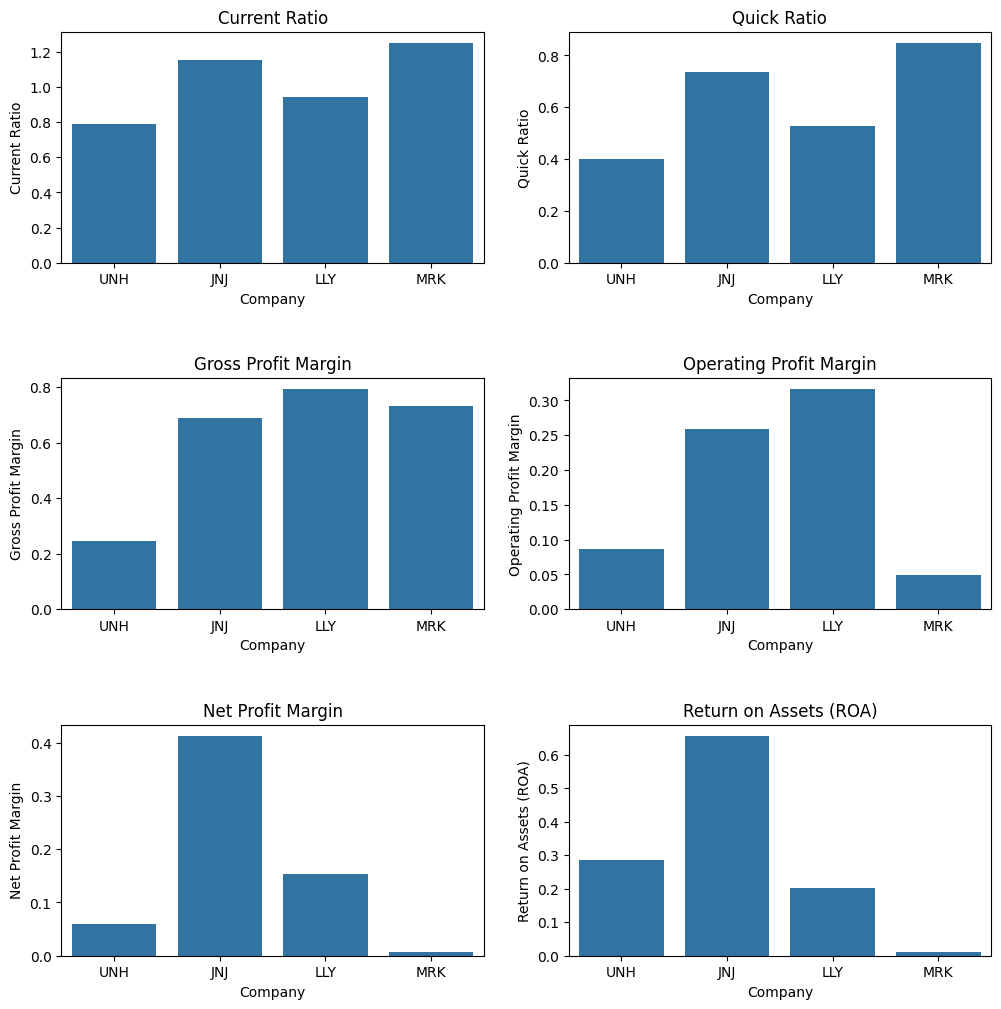

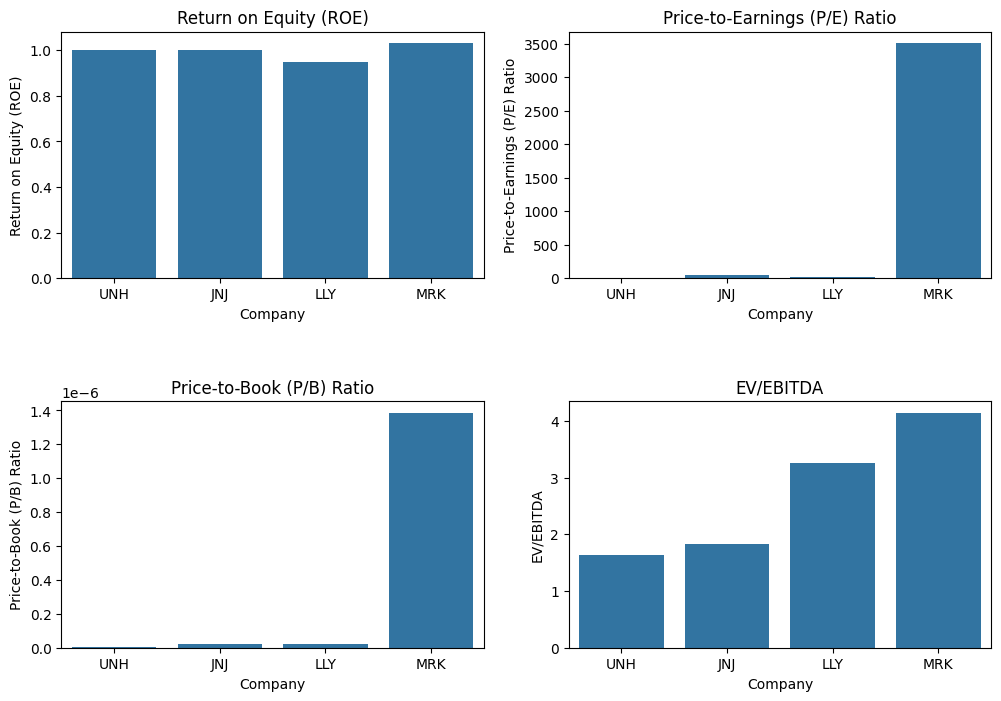

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a figure with multiple subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Liquidity Ratios
ax = axs[0, 0]
sns.barplot(x='Company', y='Current Ratio', data=ratios, ax=ax)
ax.set_title('Current Ratio')

ax = axs[0, 1]
sns.barplot(x='Company', y='Quick Ratio', data=ratios, ax=ax)
ax.set_title('Quick Ratio')

# Profitability Ratios
ax = axs[1, 0]
sns.barplot(x='Company', y='Gross Profit Margin', data=ratios, ax=ax)
ax.set_title('Gross Profit Margin')

ax = axs[1, 1]
sns.barplot(x='Company', y='Operating Profit Margin', data=ratios, ax=ax)
ax.set_title('Operating Profit Margin')

ax = axs[2, 0]
sns.barplot(x='Company', y='Net Profit Margin', data=ratios, ax=ax)
ax.set_title('Net Profit Margin')

ax = axs[2, 1]
sns.barplot(x='Company', y='Return on Assets (ROA)', data=ratios, ax=ax)
ax.set_title('Return on Assets (ROA)')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the figure
plt.show()

# Create a new figure for the remaining ratios
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Remaining Ratios
ax = axs[0, 0]
sns.barplot(x='Company', y='Return on Equity (ROE)', data=ratios, ax=ax)
ax.set_title('Return on Equity (ROE)')

ax = axs[0, 1]
sns.barplot(x='Company', y='Price-to-Earnings (P/E) Ratio', data=ratios, ax=ax)
ax.set_title('Price-to-Earnings (P/E) Ratio')

ax = axs[1, 0]
sns.barplot(x='Company', y='Price-to-Book (P/B) Ratio', data=ratios, ax=ax)
ax.set_title('Price-to-Book (P/B) Ratio')

ax = axs[1, 1]
sns.barplot(x='Company', y='EV/EBITDA', data=ratios, ax=ax)
ax.set_title('EV/EBITDA')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the figure
plt.show()

Here's an interpretation of the profitability, liquidity, and valuation metrics for the four healthcare firms:

**Profitability Ratios**:

1. **Gross Profit Margin**: UNH has the lowest gross profit margin at 24.48%, indicating a relatively lower profitability level compared to the other firms. JNJ (68.82%), LLY (79.25%), and MRK (73.17%) have higher gross profit margins, suggesting better control over direct costs and pricing power.

2. **Operating Profit Margin**: JNJ (25.84%) and LLY (31.61%) have the highest operating profit margins, indicating their ability to generate profits from operations efficiently. MRK (4.91%) and UNH (8.71%) have lower operating profit margins, which could be due to higher operating expenses or competitive pressures.

3. **Net Profit Margin**: JNJ (41.28%) has the highest net profit margin, showcasing its strong profitability after accounting for all expenses and taxes. LLY (15.36%) and UNH (6.02%) have moderate net profit margins, while MRK (0.61%) has the lowest, indicating potential challenges in converting revenue into net income.

4. **Return on Assets (ROA)**: JNJ (65.71%) and UNH (28.53%) have the highest ROA, suggesting efficient use of their assets to generate profits. LLY (20.37%) and MRK (1.13%) have lower ROA, indicating room for improvement in asset utilization.

5. **Return on Equity (ROE)**: UNH (100.31%) and MRK (102.98%) have the highest ROE, indicating their ability to generate profits from shareholders' equity effectively. JNJ (100.00%) and LLY (94.84%) also have relatively high ROE.

**Liquidity Ratios**:

1. **Current Ratio**: MRK (1.25) and JNJ (1.16) have the highest current ratios, suggesting a stronger ability to meet short-term obligations. UNH (0.79) and LLY (0.94) have lower current ratios, indicating a potential need for closer monitoring of their liquidity positions.

2. **Quick Ratio**: The quick ratios follow a similar pattern to the current ratios, with MRK (0.85), JNJ (0.74), LLY (0.53), and UNH (0.40) in descending order. Lower quick ratios may indicate a higher reliance on inventory to meet short-term obligations.

**Valuation Ratios**:

1. **Price-to-Earnings (P/E) Ratio**: MRK (3503.46) has an extremely high P/E ratio, which could indicate an overvalued stock or high growth expectations. JNJ (50.35), LLY (22.38), and UNH (6.06) have more moderate P/E ratios.

2. **Price-to-Book (P/B) Ratio**: The P/B ratios for all four firms are relatively low, suggesting that their stock prices are trading at a discount to their book values.

3. **Enterprise Value to EBITDA (EV/EBITDA)**: MRK (4.14) and LLY (3.26) have the highest EV/EBITDA ratios, indicating potential overvaluation or high growth expectations. JNJ (1.83) and UNH (1.64) have lower EV/EBITDA ratios, which could suggest better value relative to their earnings and cash flow generation.

Overall, the analysis reveals that JNJ and UNH demonstrate strong profitability and asset utilization, while MRK and LLY have room for improvement in certain areas. Liquidity positions vary, with MRK and JNJ appearing more liquid. Valuation metrics suggest potential overvaluation for MRK and LLY, while JNJ and UNH may offer better value relative to their earnings and cash flow generation. However, it's essential to consider these ratios within the broader context of the companies' strategies, competitive landscapes, and industry trends.